In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("KaggleV2.csv")
print(df)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB
None


### total rows and columns

In [7]:
print(df.shape)

(110527, 14)


In [41]:
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105260e+05   1.105260e+05  110526.000000  110526.000000   
mean   7.115694e+13   5.675304e+06      37.089219       0.098266   
std    8.639116e+13   7.129544e+04      23.110026       0.297676   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172536e+12   5.640285e+06      18.000000       0.000000   
50%    3.173184e+13   5.680572e+06      37.000000       0.000000   
75%    9.438963e+13   5.725523e+06      55.000000       0.000000   
max    2.297204e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean        0.197248       0.071865       0.030400       0.022248   
std         0.397923       0.258266       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

### check null values

In [8]:
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### check duplicates

In [10]:
print(df.duplicated().sum())

0


### check outliers

<Axes: >

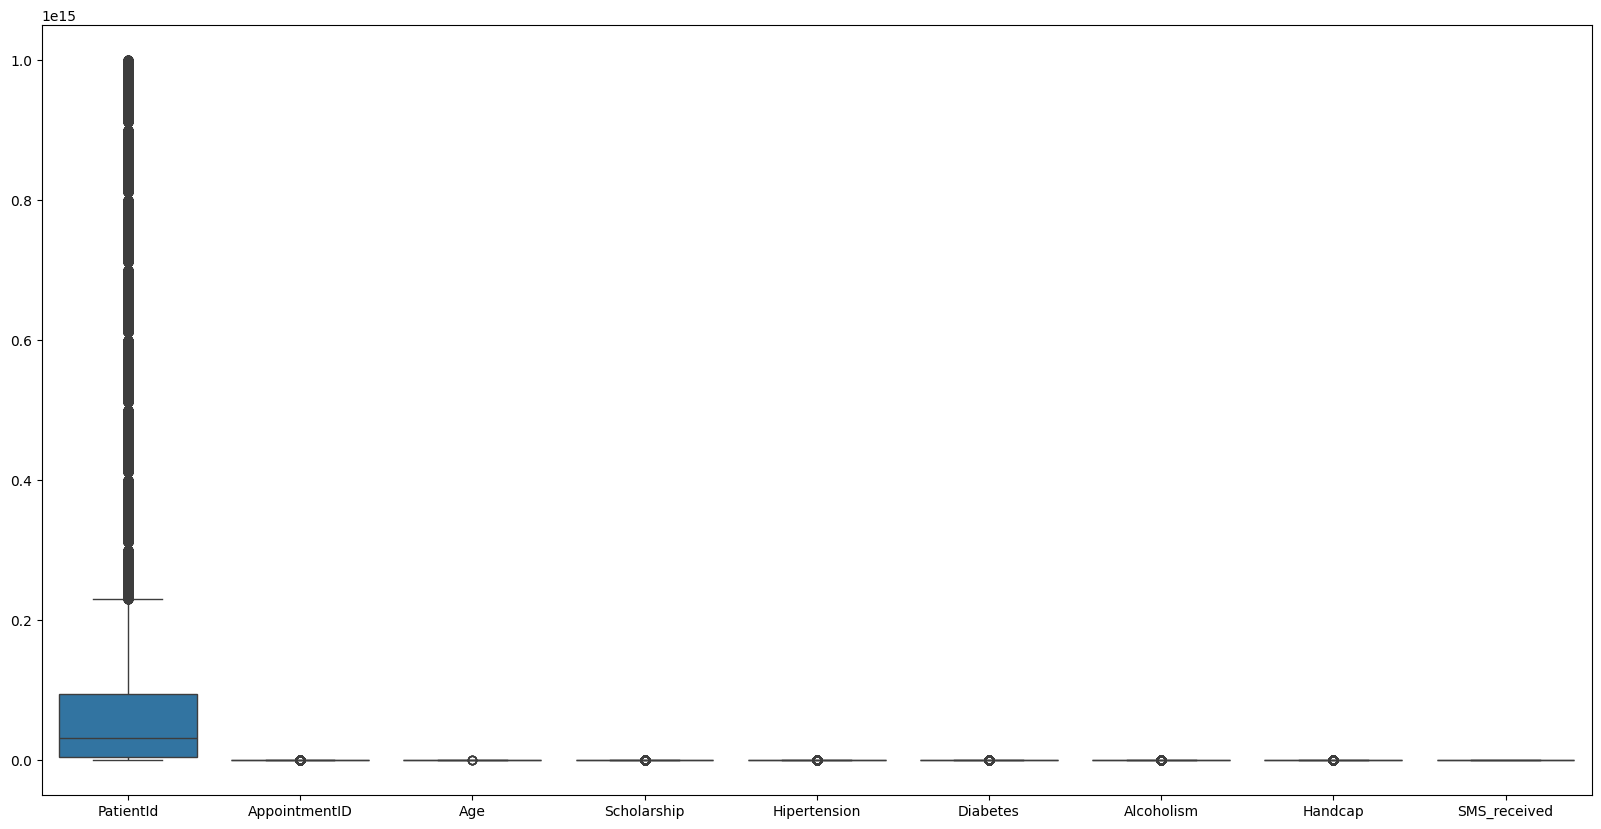

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

### In PatientId column contain most outliers

### IQR Method to detect outliers

In [26]:
q1=df['PatientId'].quantile(0.25)
q3=df['PatientId'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
outlier=df.loc[(df['PatientId']>upper)|(df['PatientId']<lower)]
print(len(outlier))

21588


### Clipping method to correct outliers
#### To handle outliers in the dataset, we applied the Interquartile Range (IQR) method, which is a robust statistical technique. The goal was to identify and treat extreme values that could potentially skew the results of data analysis or machine learning models

In [27]:
q1=df['PatientId'].quantile(0.25)
q3=df['PatientId'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
df.loc[df['PatientId']>upper,'PatientId']=upper
df.loc[df['PatientId']<lower,'PatientId']=lower

<Axes: >

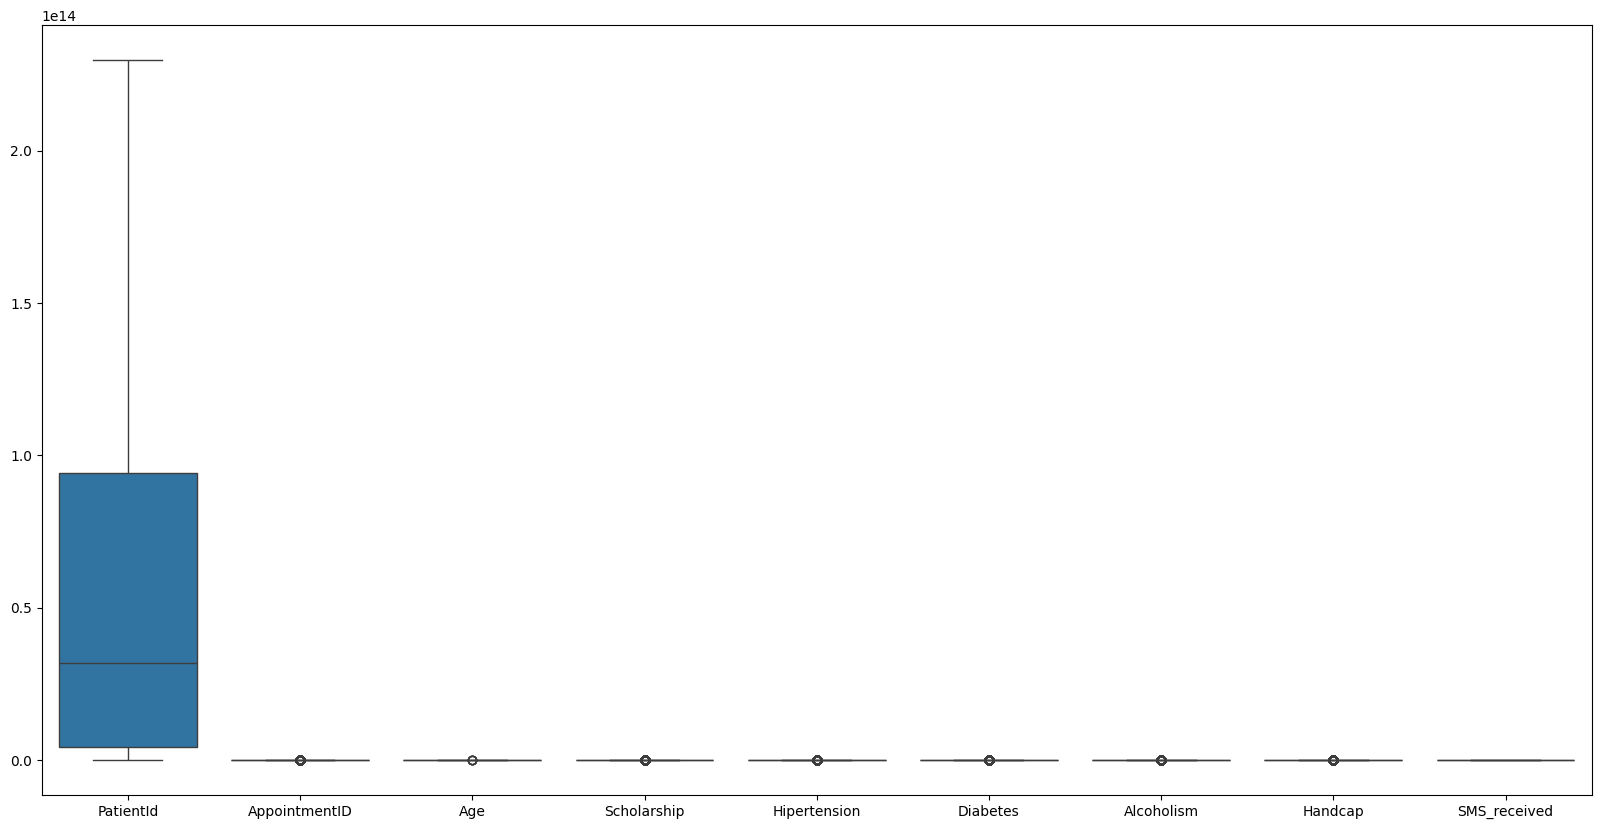

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

### A histogram for the distribution of Age (continuous variable)
### A bar chart for the distribution of Gender (categorical variable)


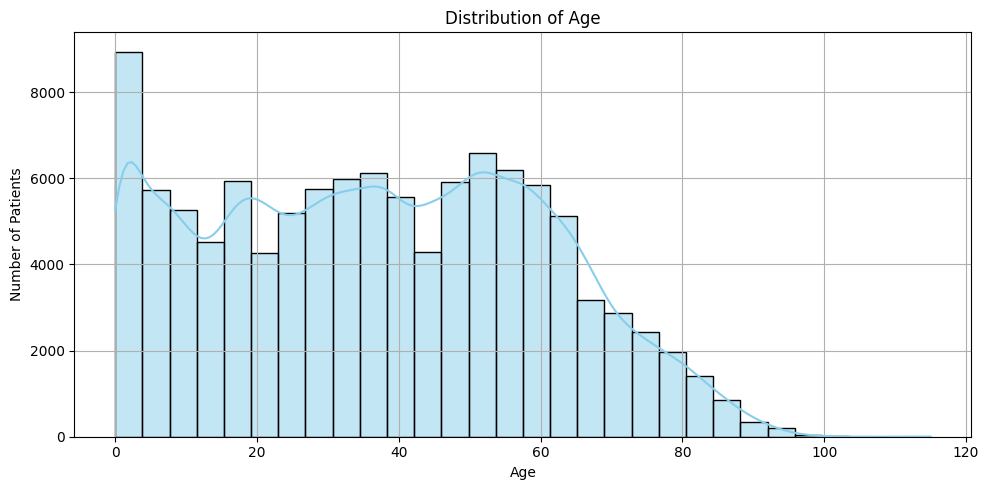

In [30]:
df = df[df['Age'] >= 0]

# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_5492\2427683575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


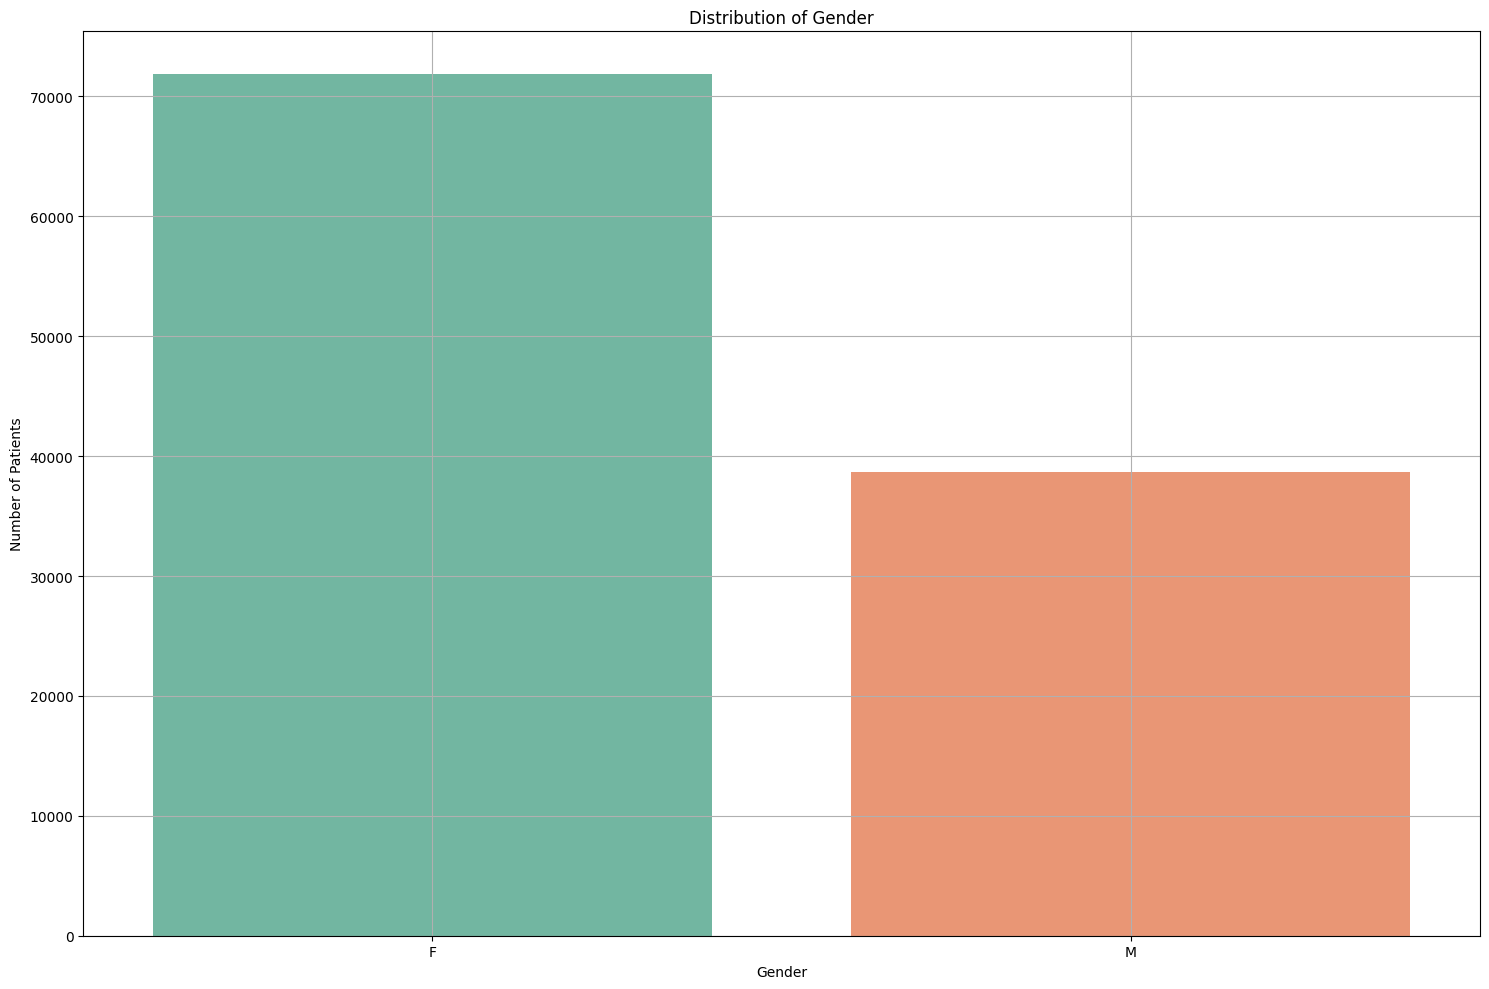

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

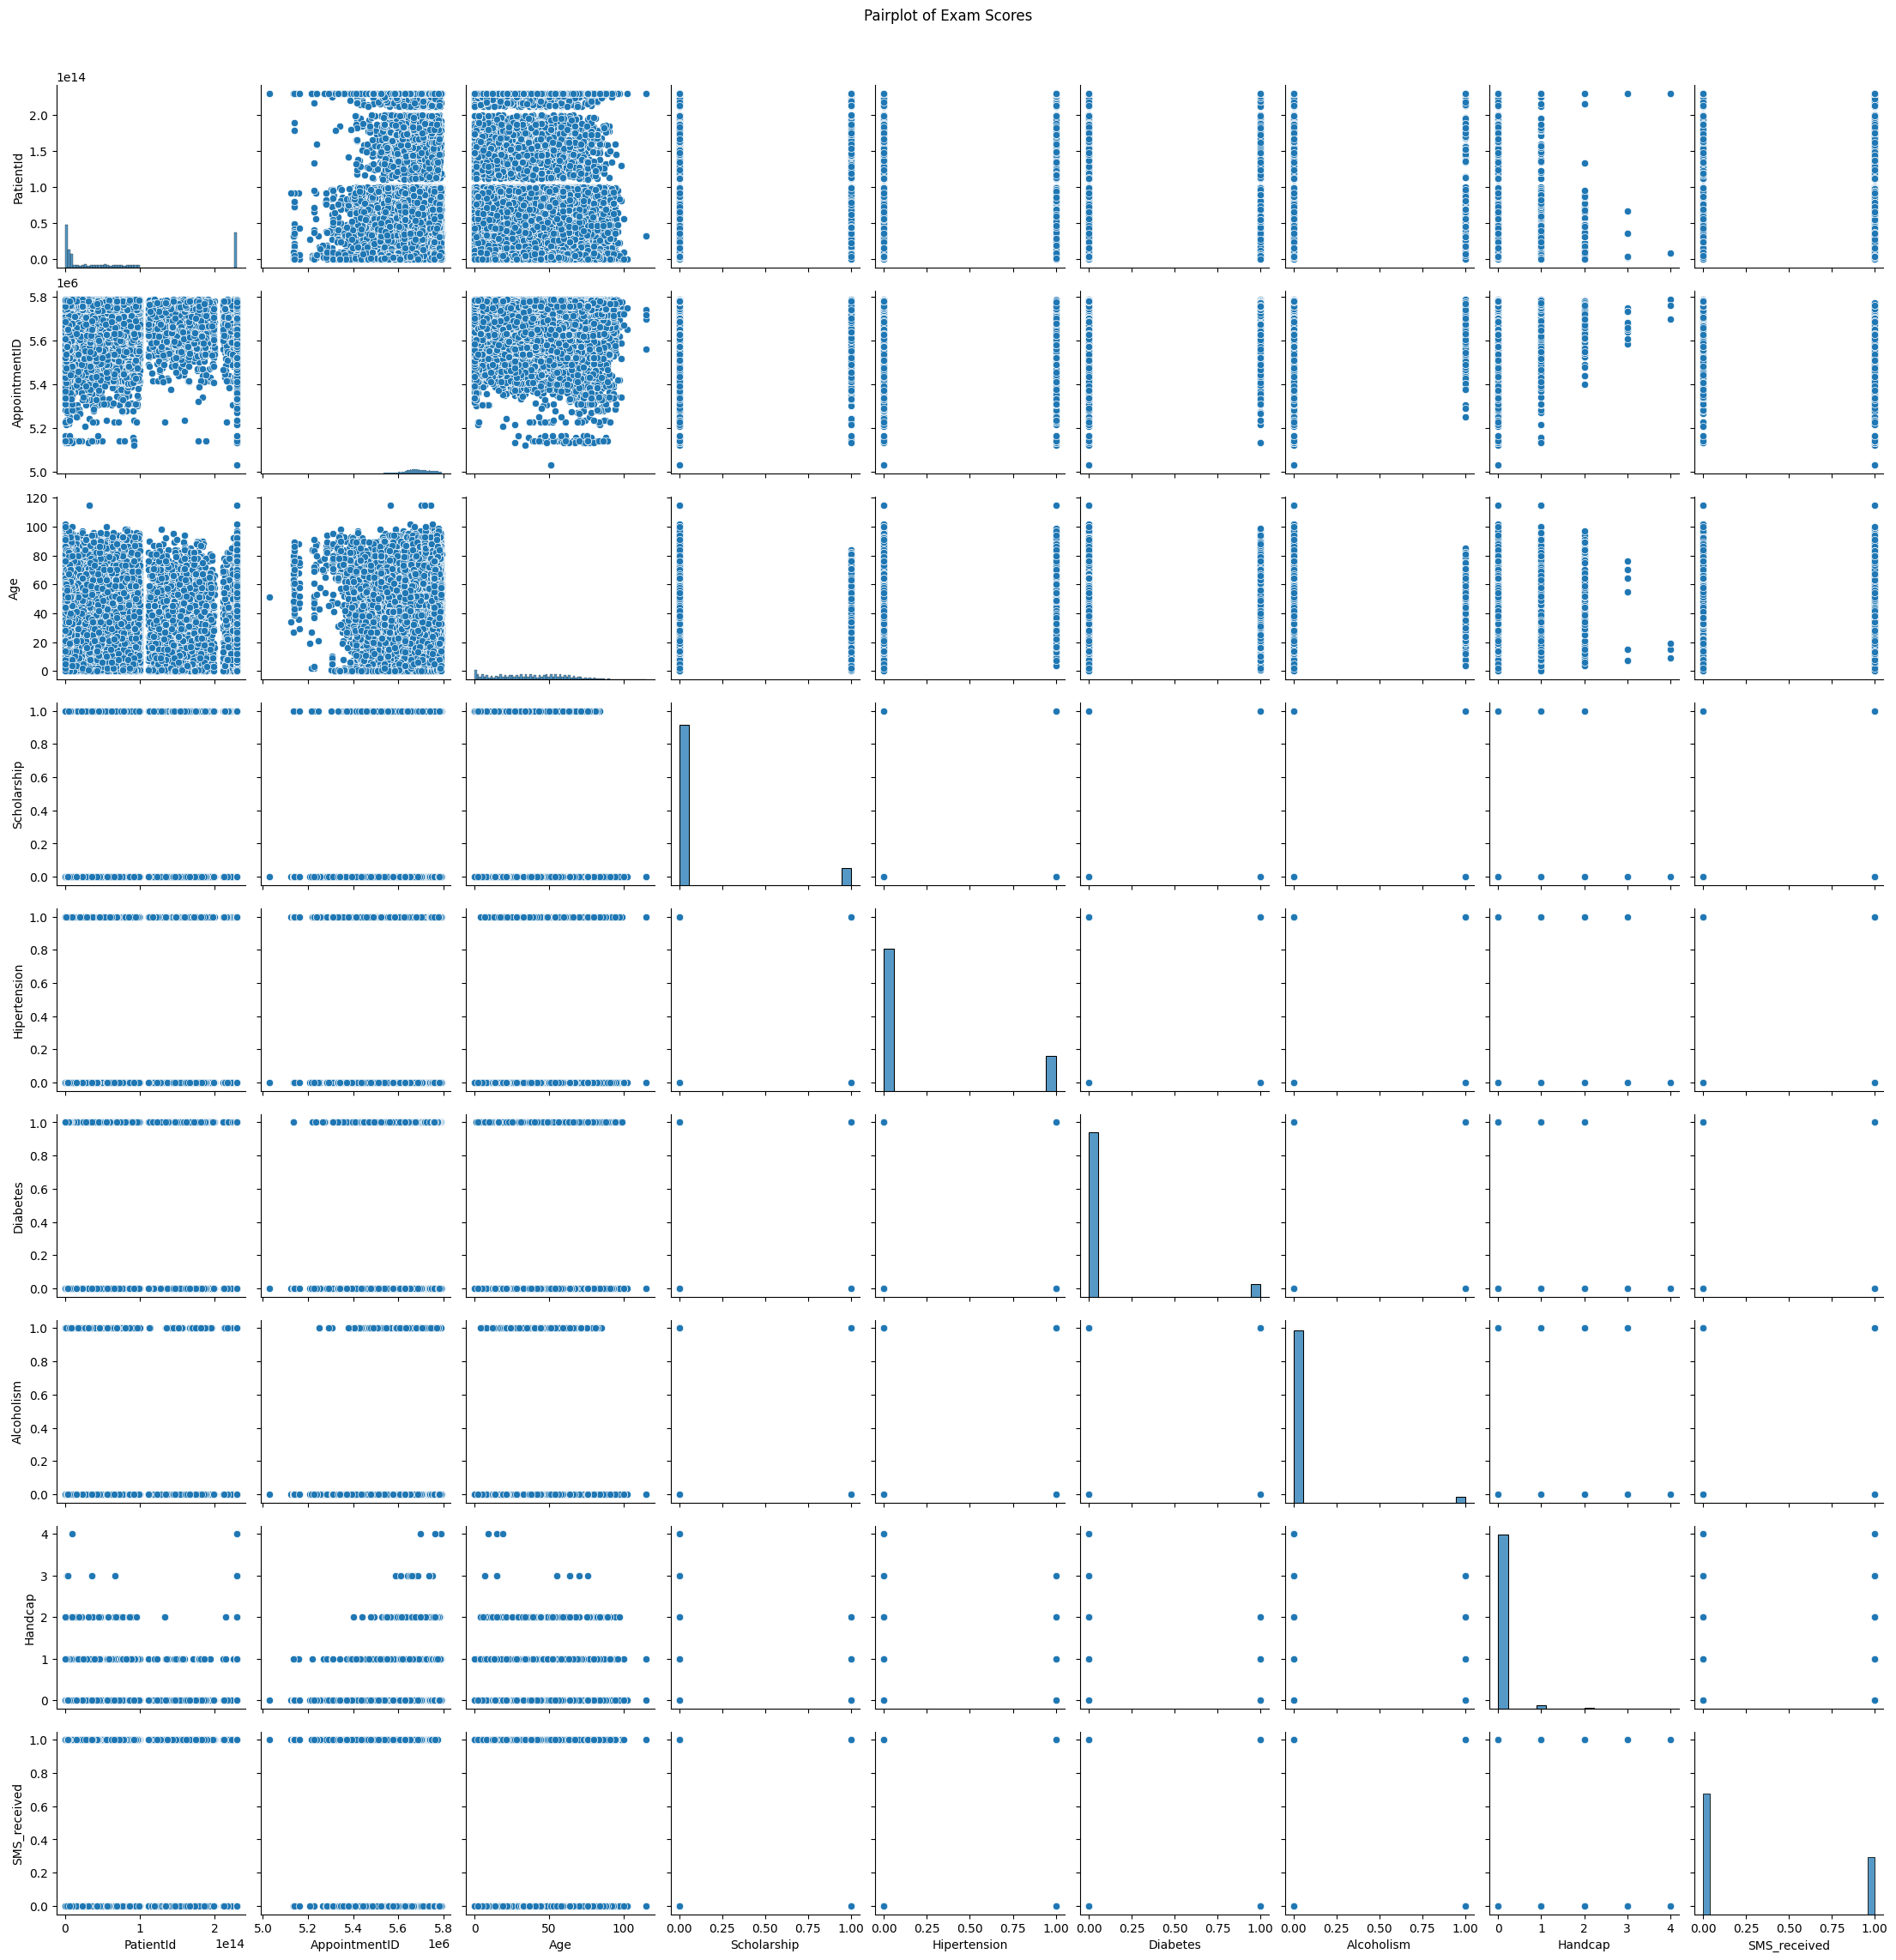

In [42]:
sns.pairplot(df)
plt.suptitle('Pairplot of Exam Scores', y=1.02)
plt.show()


In [39]:
# Total diabetes effect percentage
total=df.groupby('Diabetes')['Age'].mean()
print(total)

Diabetes
0    35.208962
1    61.372529
Name: Age, dtype: float64
